In [1]:
#https://python.plainenglish.io/triple-moving-average-trading-strategy-aaa44d96d532
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy.optimize import brute
plt.style.use("seaborn")
#!pip install pandas_datareader
import pandas_datareader.data as web

In [2]:
start= pd.to_datetime('2020-01-01')
end= pd.to_datetime('2020-10-01')
df = web.DataReader('BTC-USD','yahoo',start, end)

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,1.844427e+10,7410.656738
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,1.972507e+10,7411.317383


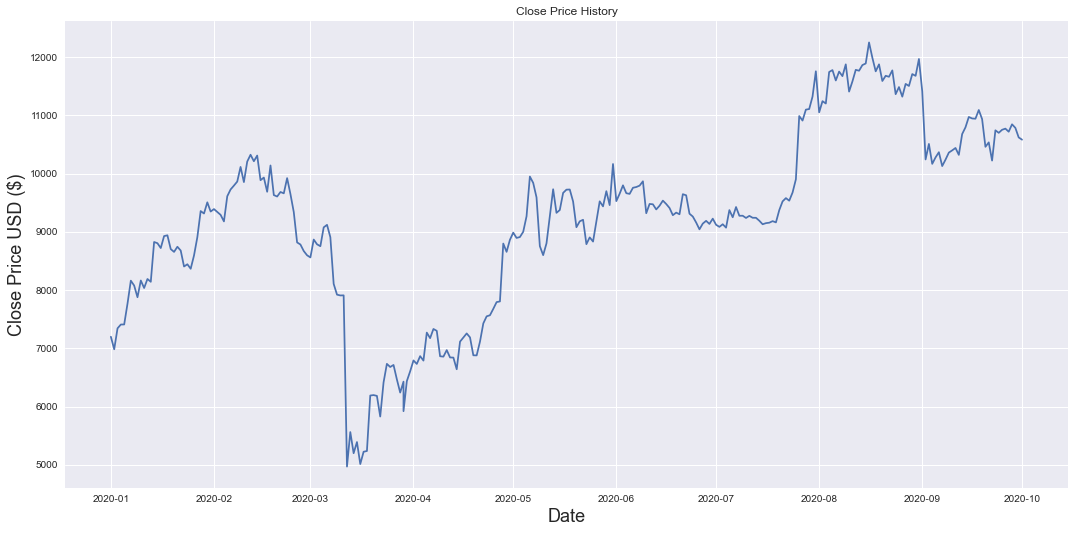

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [5]:
#Calculate the Short/Fast Exponential Moving Average
ShortEMA = df.Close.ewm(span=5, adjust=False).mean() #AKA Fast moving average
#Calculate the Middle Exponential Moving Average
MiddleEMA = df.Close.ewm(span=21, adjust=False).mean() #AKA Slow moving average
#Calculate the Long/Slow Exponential Moving Average
LongEMA = df.Close.ewm(span=63, adjust=False).mean() #AKA Slow moving average

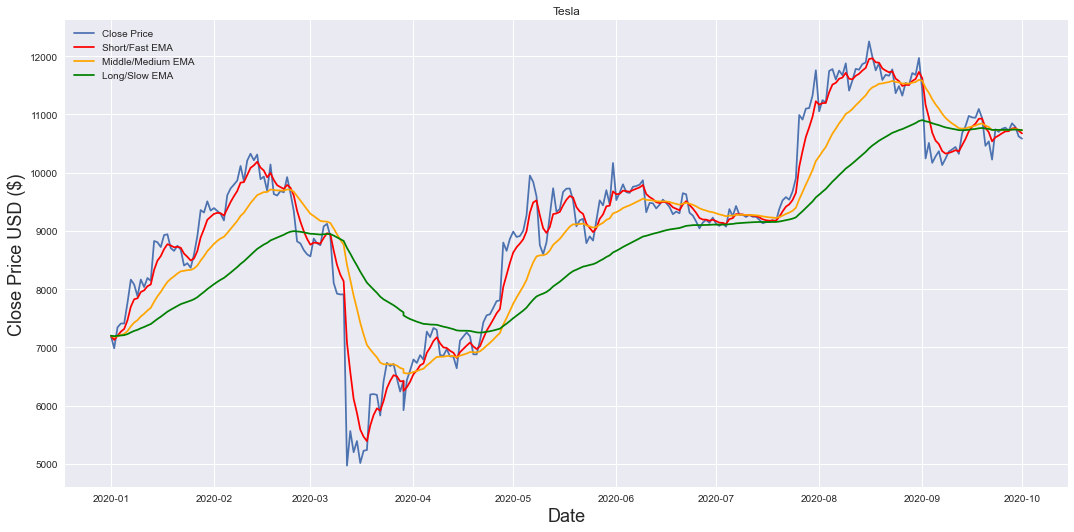

In [6]:
#Visualize the closing price and the exponential moving averages
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.plot(df['Close'], label = 'Close Price')
plt.plot(ShortEMA, label='Short/Fast EMA', color = 'red')
plt.plot(MiddleEMA, label='Middle/Medium EMA', color = 'orange')
plt.plot(LongEMA, label='Long/Slow EMA', color = 'green')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [7]:
#Add the exponential moving averages to the data set
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close,Short,Middle,Long
Date,,,,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316,7200.174316,7200.174316,7200.174316
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215,7128.606283,7180.655762,7193.464813
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277,7200.698947,7195.585627,7198.196671
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,1.844427e+10,7410.656738,7270.684878,7215.137546,7204.836049
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,1.972507e+10,7411.317383,7317.562379,7232.972077,7211.288590
...,...,...,...,...,...,...,...,...,...
2020-09-27,10949.123047,10716.676758,10771.641602,10721.327148,2.272037e+10,10721.327148,10713.740493,10736.333458,10736.152781
2020-09-28,10858.939453,10665.344727,10712.462891,10848.830078,2.045987e+10,10848.830078,10758.770355,10746.560423,10739.673947
2020-09-29,10856.528320,10689.670898,10845.411133,10787.618164,2.075962e+10,10787.618164,10768.386291,10750.292945,10741.172204


In [11]:
#Create a function to buy and sell the stock (The trading strategy)
def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False

        
    for i in range(0,len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Long'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short = True
            
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Long'][i] and flag_short == False and flag_long == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_short == True and data['Middle'][i] > data['Long'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short = False
        elif flag_long == True and data['Middle'][i] < data['Long'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_long = False
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
    return (buy_list, sell_list)
   

In [12]:
#Add the Buy and Sell signals to the data set
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] =buy_sell_function(df)[1]

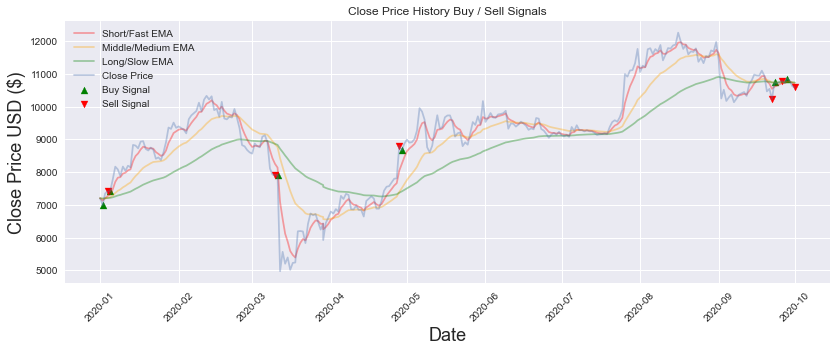

In [13]:
# Visually Show The Stock buy and sell signals
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(df.index, df['Buy'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(ShortEMA, label='Short/Fast EMA', color = 'red', alpha = 0.35)
plt.plot(MiddleEMA, label='Middle/Medium EMA', color = 'orange', alpha = 0.35)
plt.plot(LongEMA, label='Long/Slow EMA', color = 'green', alpha = 0.35)
plt.plot( df['Close'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title('Close Price History Buy / Sell Signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()